In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
sns.set(font_scale=1)
from scipy import stats

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
desc_file = open('data_description.txt')
print(desc_file)

<_io.TextIOWrapper name='data_description.txt' mode='r' encoding='cp1252'>


In [8]:
print(desc_file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
corr = train.corr()['SalePrice']
corr[np.argsort(corr,axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1.0, 'Correlation coefficients w.r.t Sale Price')

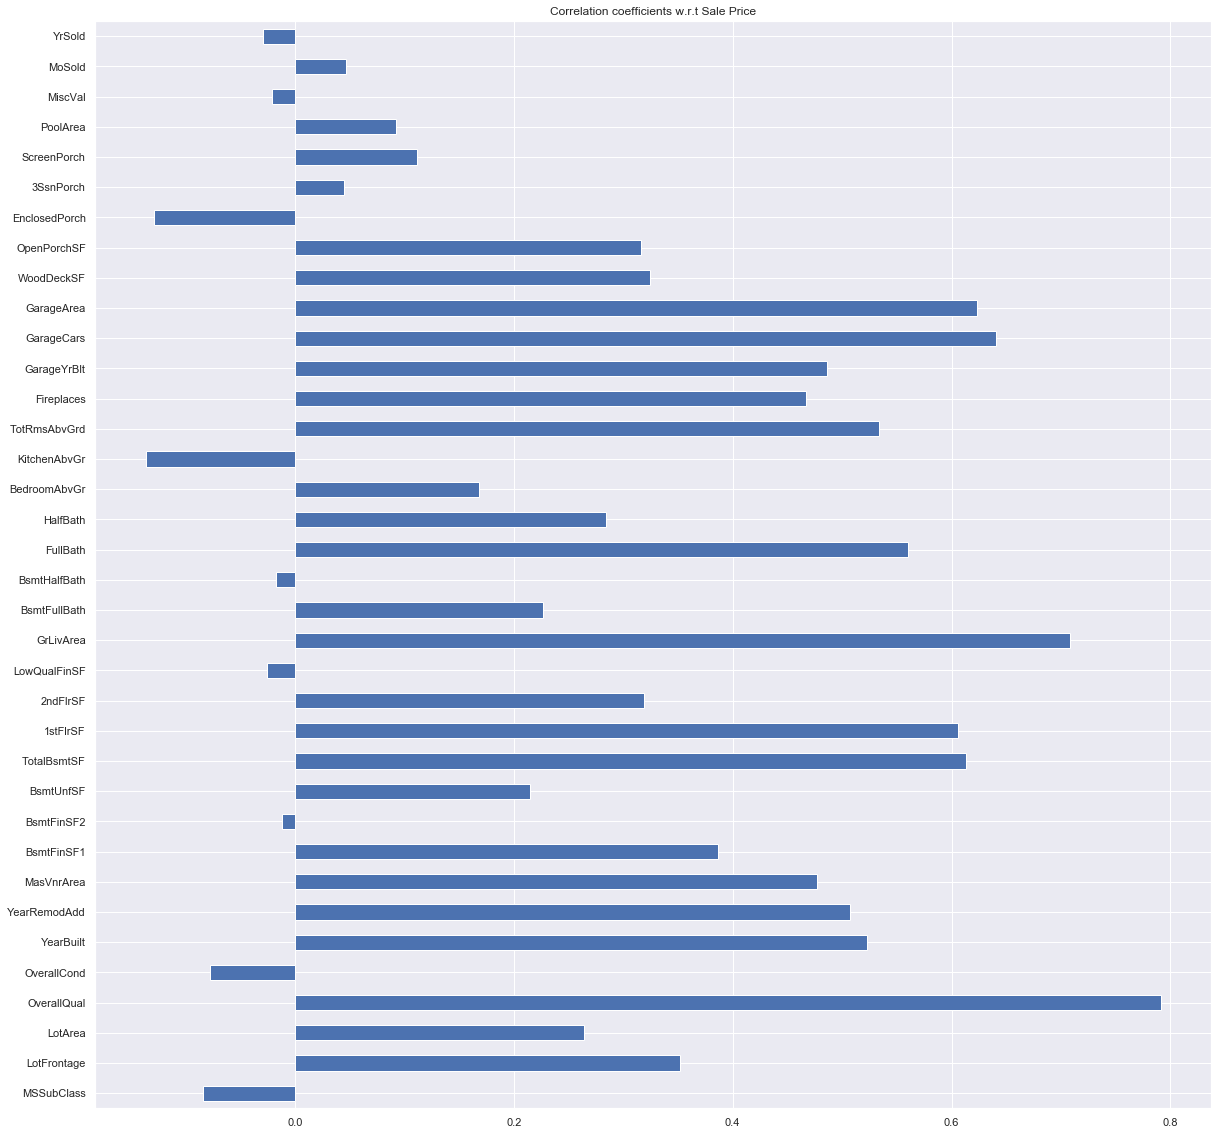

In [13]:
plt.figure(figsize=(20,20))
corr = corr[1:-1]
corr.plot(kind='barh')
plt.title('Correlation coefficients w.r.t Sale Price')

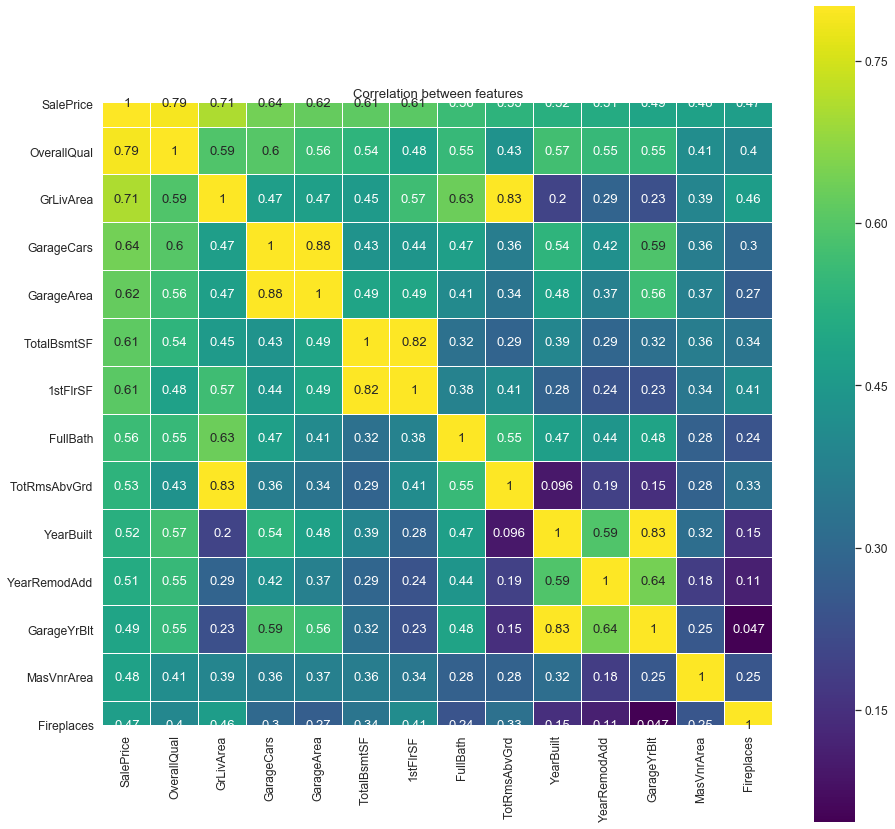

In [14]:
high_positive_correlated_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', \
                               'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', \
                               'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

corrMatrix = train[high_positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

In [15]:
feature_variable = 'OverallQual'
target_variable = 'SalePrice'
train[[feature_variable,target_variable]].groupby([feature_variable],as_index=False).mean().sort_values(by=feature_variable,ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [16]:
feature_variable = 'GarageCars'
target_variable = 'SalePrice'
train[[feature_variable,target_variable]].groupby([feature_variable],as_index=False).mean().sort_values(by= feature_variable,ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


# OverallQual

* TolRmsAbvGrd and GrLivArea are correlated as stated above with 83% Hence we can only take *GrLivArea* because it has higher correlation with *SalePrice* as compared to *TotalRmsAbvGrid*

GarageArea and GarageCars are correlated as stated above with 88%. Hence, we only take GarageCars because it has a bit higher correlation with SalePrice as compared to GarageArea.

1stFlrSF and TotalBsmtSF are correlated with 82%. We keep TotalBsmtSF because it has a bit higher correlation with SalePrice as compared to 1stFlrSF.

GarageYrBlt and YearBuilt are correlated as stated above with 83%. We keep YearBuilt because it has higher correlation with SalePrice as compared to GarageYrBlt.

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


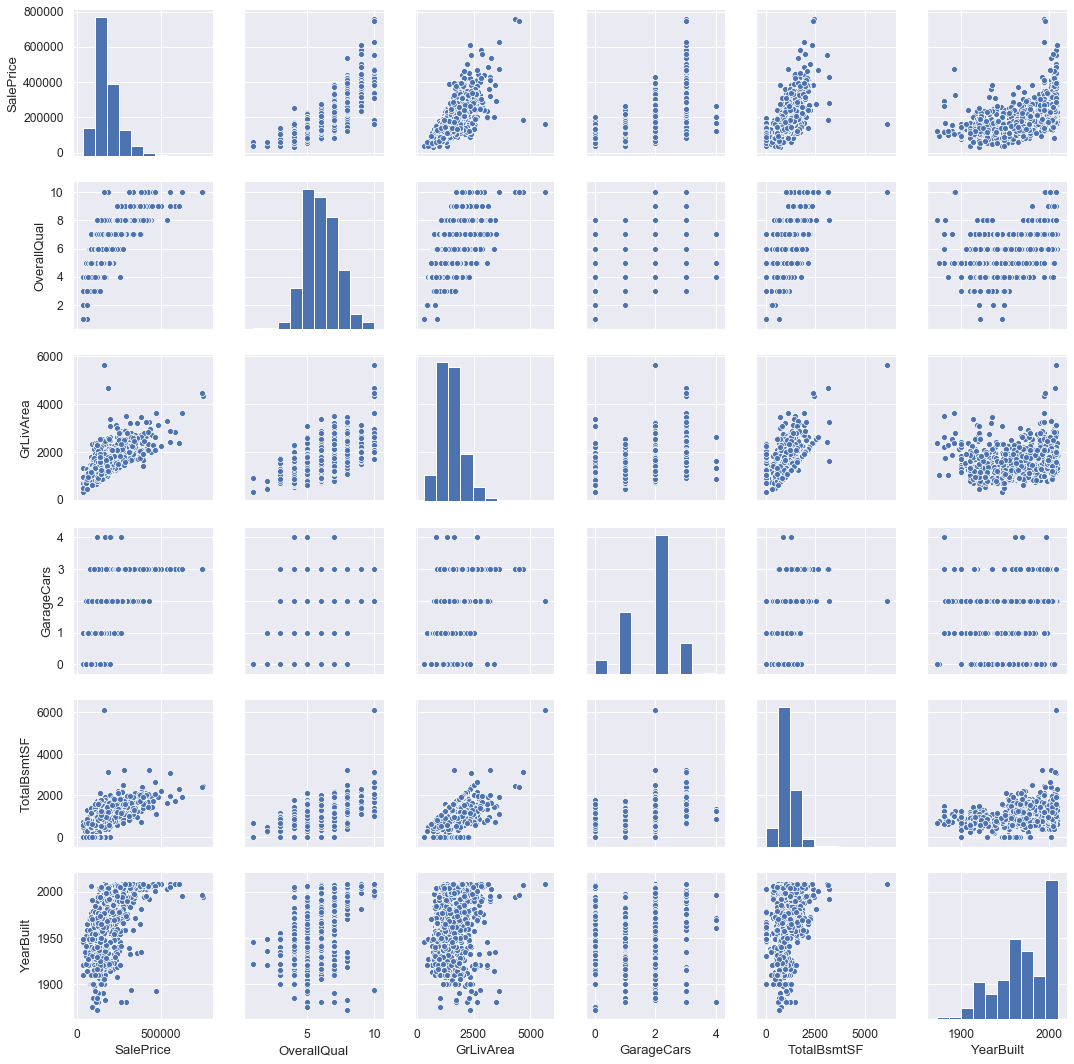

In [17]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt']
sns.pairplot(train[cols],size=2.5)

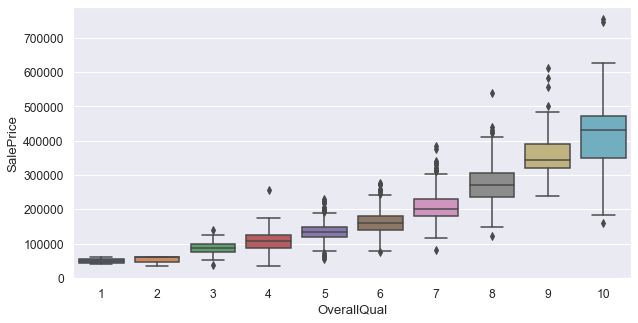

In [18]:
plt.figure(figsize=[10,5])
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

In [19]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Number of occurances')

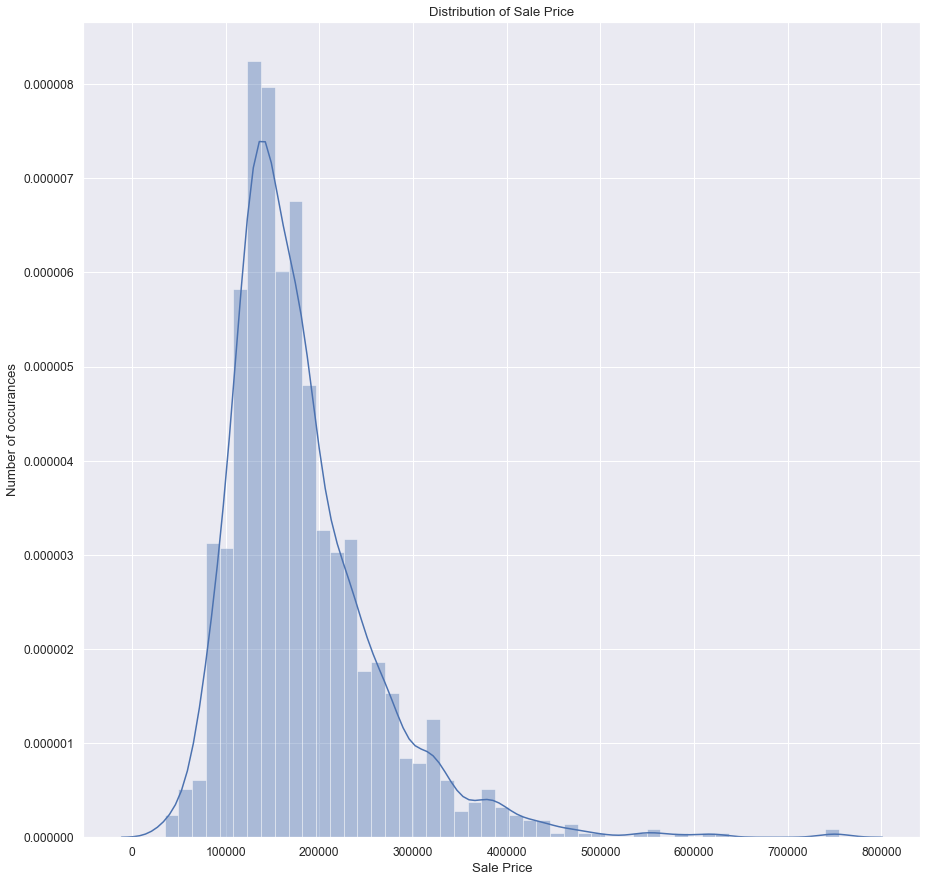

In [20]:
plt.figure(figsize=[15,15])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of occurances')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519417, 180921.19589041095, 0.9319665641512986))

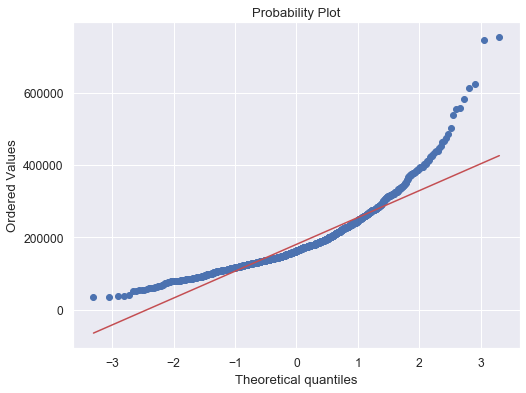

In [21]:
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'],plot=plt)

In [22]:
print('Skewness: %f'% train['SalePrice'].skew())
print('Kurtosis: %f'% train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


It is positively skewed and have high kurtosis

High Kurtosis means the Sale Price have outlier we have to reduce these outliers

Text(0, 0.5, 'Number of Occurances')

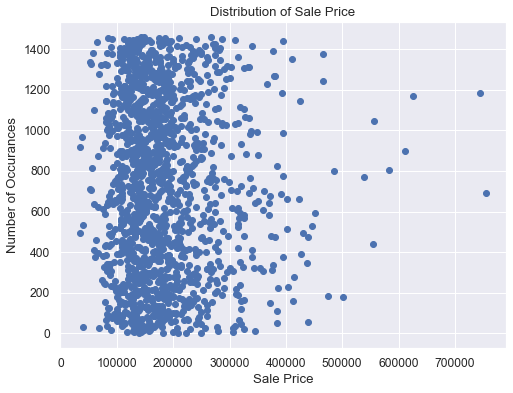

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(train['SalePrice'].values,range(train.shape[0]))
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurances')

# Removing Outliers

In [24]:
upperlimit  = np.percentile(train.SalePrice,99.5)
train['SalePrice'].loc[train['SalePrice']>upperlimit]= upperlimit

C:\Users\Microsoft\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Number of occurances')

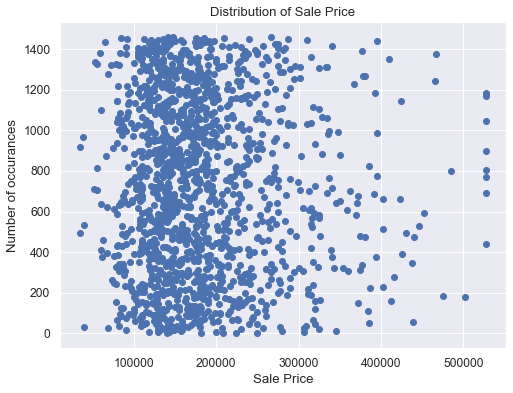

In [25]:
plt.figure(figsize=[8,6])
plt.scatter(train['SalePrice'].values,range(train.shape[0]))
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of occurances')

In [26]:
train['SalePrice'] = np.log(train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.17558545,
         13.17558545, 13.17558545])),
 (0.3956831776652713, 12.023196041130895, 0.9957775371441351))

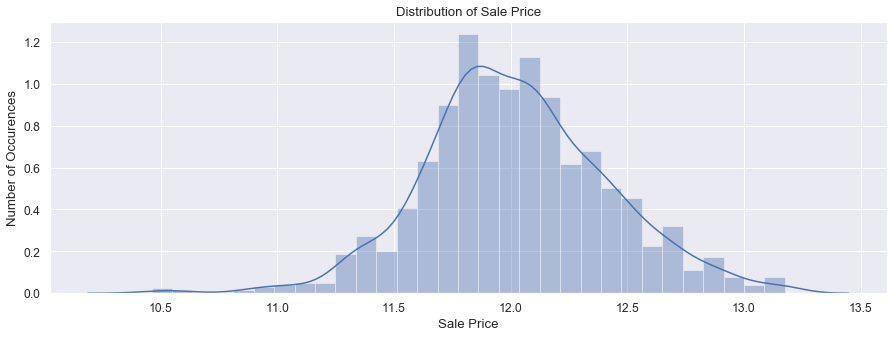

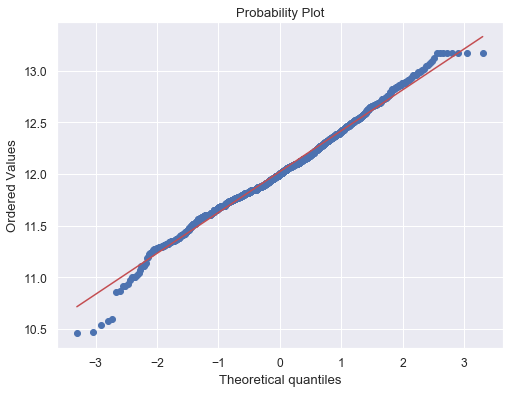

In [27]:
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [28]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.062732
Kurtosis: 0.622026


C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 26.256000000000014, 'Pool Area in sq feet')

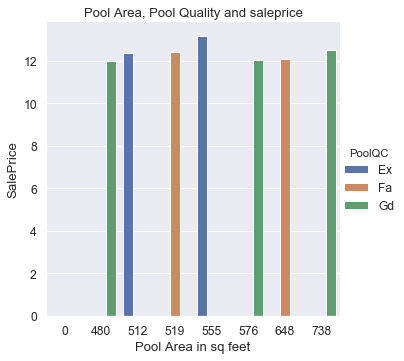

In [29]:
sns.factorplot(x="PoolArea",y="SalePrice",data = train,hue="PoolQC",kind="bar")
plt.title("Pool Area, Pool Quality and saleprice")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet")

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


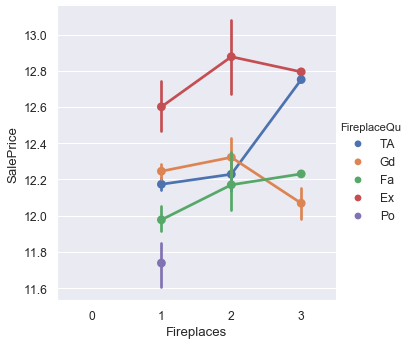

In [30]:
sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu");

In [31]:
pd.crosstab(train.Fireplaces,train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


# GrLivArea vs SalePrice

Text(0, 0.5, 'SalePrice')

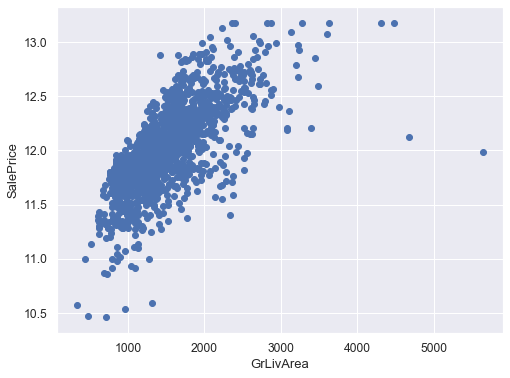

In [32]:
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlabel("GrLivArea",fontsize=13)
plt.ylabel("SalePrice",fontsize=13)

# Let's remove these outliers.

In [33]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0, 0.5, 'SalePrice')

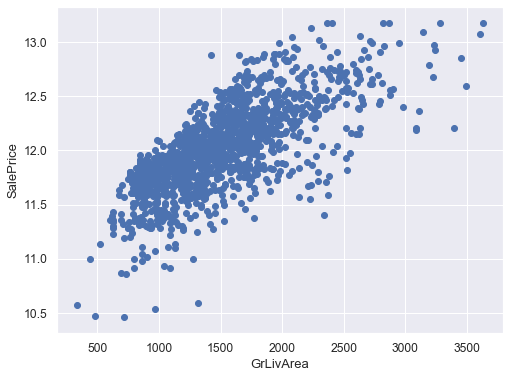

In [34]:
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

# Getting Missing Values

In [35]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.shape

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(2915, 80)

In [38]:
null_columns = all_data.columns[all_data.isnull().any()]
total_null_columns = all_data[null_columns].isnull().sum()
percent_null_columns = (all_data[null_columns].isnull().sum()/ all_data[null_columns].isnull().count())
missing_data = pd.concat([total_null_columns,percent_null_columns],axis=1,keys=['Total','Percent']).sort_values(by=['Percent'],ascending=False)
missing_data

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


Text(0.5, 1.0, 'Percent missing data by features')

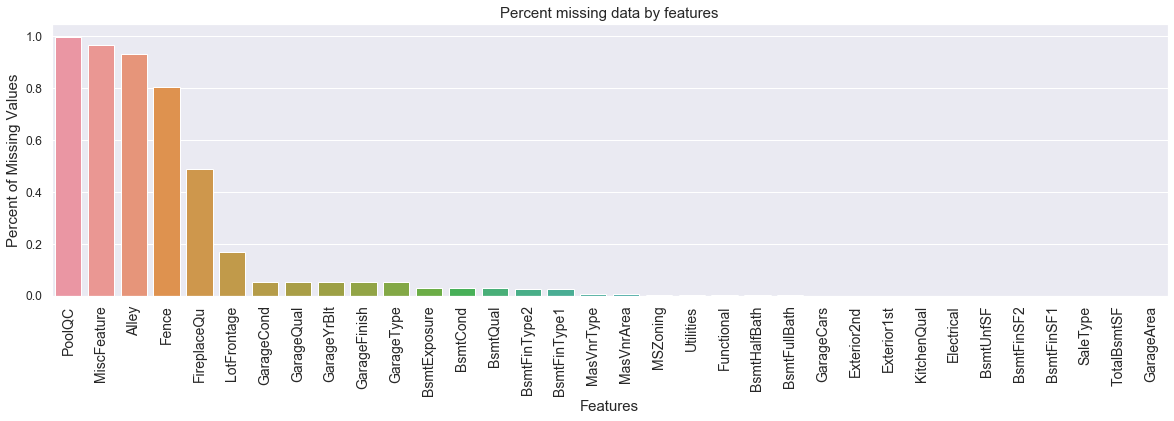

In [39]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90',fontsize=14)
sns.barplot(x=missing_data.index,y=missing_data.Percent)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of Missing Values',fontsize=15)
plt.title('Percent missing data by features',fontsize=15)

# Imputing missing values

Replacing Missing data substitued values

+99% values are missing for PoolQC. This means majority of houses have "no Pool" in them. We replace NULL values with "None".

In [40]:
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [41]:
all_data['PoolQC'].fillna('None',inplace=True)

In [42]:
all_data['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

+96% values are missing for MiscFeature. Null value or NA means "no misc feature" in the house.

In [43]:
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [44]:
all_data['MiscFeature'].fillna('None',inplace=True)

+93% values are missing for Alley. Null value or NA means "no alley access" in the house.

In [45]:
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [46]:
all_data['Alley'].fillna('None',inplace=True)

+80% values are missing for Fence. Null value or NA means "no fence" in the house.

In [47]:
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [48]:
all_data['Fence'].fillna('None',inplace=True)

+48% values are missing for FireplaceQu. Null value or NA means "no fireplace" in the house.

In [49]:
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [50]:
all_data['FireplaceQu'].fillna('None',inplace=True)

LotFrontage: Linear feet of street connected to property

16.67% values are missing for LotFrontage. We can assume that the distance of the street connected to the property (LotFrontage) will be same as that of that particular property's neighbor property (Neighborhood).

We can fill the missing value by the median LotFrontage of all the Neighborhood.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

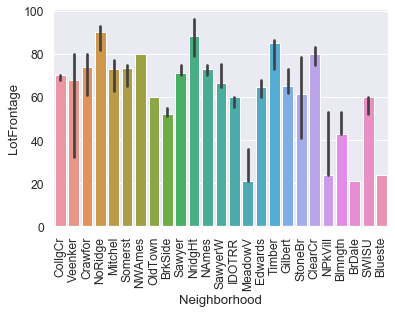

In [51]:
sns.barplot(data=train,x='Neighborhood',y='LotFrontage',estimator= np.median)
plt.xticks(rotation=90)

In [52]:
all_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.,
        26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,  22.,
       123., 160., 195., 155., 126., 200., 131., 133.])

In [53]:
all_data['LotFrontage'] = all_data.groupby("Neighborhood")['LotFrontage'].transform(
lambda x: x.fillna(x.median()))

In [54]:
all_data['LotFrontage'].unique()

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
        70. ,  72. ,  91. ,  73. ,  66. , 101. ,  57. ,  44. , 110. ,
        98. ,  47. , 108. , 112. ,  74. , 115. ,  67. ,  61. ,  48. ,
        33. ,  64. ,  52. , 100. ,  24. ,  89. ,  63. ,  76. ,  81. ,
        95. ,  69. ,  21. ,  32. ,  78. , 121. , 122. ,  40. , 105. ,
        77. ,  94. ,  34. ,  90. ,  80.5,  55. ,  88. ,  82. ,  71. ,
       120. , 107. ,  92. , 134. ,  62. ,  86. , 141. ,  97. ,  72.5,
        54. ,  41. ,  79. , 174. ,  99. ,  83. ,  43. , 103. ,  93. ,
        30. ,  64.5, 129. , 140. ,  35. ,  37. , 118. ,  87. , 116. ,
       150. , 111. ,  49. ,  96. ,  59. ,  36. ,  56. , 102. ,  58. ,
        38. , 109. , 130. ,  53. , 137. ,  88.5,  45. , 106. ,  42. ,
        39. , 104. , 144. , 114. , 128. , 149. , 313. , 168. , 182. ,
       138. , 152. , 124. , 153. ,  46. ,  26. ,  25. , 119. ,  31. ,
        28. , 117. , 113. , 125. , 135. , 136. ,  22. , 123. , 160. ,
       195. , 155. ,

These are ordinal/numeric variables related to Garage. We replace their missing values with "0" (zero). Zero means no Garage in the house, so no Cars in Garage.

In [55]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    print(all_data[col].unique())

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.]
[ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.  271.  447.  556.  691.  672.  498.  246.    0.  440.
  308.  504.  300.  670.  826.  386.  388.  528.  894.  565.  641.  288.
  645.  852.  558.  220.  667.  360.  427.  490.  379.  297.  283.  509.
 

Replacing Null values with 0

In [56]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col].fillna(0,inplace=True)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2¶
These are categorical (nominal) variables related to Basement. We replace their missing values with "None". None means no Basement in the house.

In [57]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    print(all_data[col].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [58]:
#replace null values with None
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)

In [59]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col].fillna(0,inplace=True)

# MasVnrArea, MasVnrType¶
NA for MasVnrArea and MasVnrType means there is "no masonry veneer" for the house. We replace the NA value of nominal/categorical feature MasVnrType with "None" and the NA value of ordinal feature MasVnrArea with 0 (zero).

In [61]:
all_data["MasVnrType"].fillna("None",inplace=True)
all_data["MasVnrArea"].fillna(0,inplace=True)

All of these features are nominal/categorical. Each of them has less than 5 missing values. We replace the missing values of each feature by the most common value for that particular feature.

In [62]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)

In [63]:
null_columns = all_data.columns[all_data.isnull().any()]
print(null_columns)

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'TotalBsmtSF'],
      dtype='object')


# Reducing Skewness of Predictors (Independent Variables)

In [64]:
numeric_features = all_data.dtypes[all_data.dtypes !='object'].index

skewness = []
for col in numeric_features:
    skewness.append((col,all_data[col].skew()))
    
pd.DataFrame(skewness,columns=('Feature','Skewness')).sort_values(by='Skewness',ascending=False)

,Feature,Skewness
24,MiscVal,21.943440
29,PoolArea,18.711459
19,LotArea,13.130516
21,LowQualFinSF,12.086535
2,3SsnPorch,11.373947
18,KitchenAbvGr,4.301059
5,BsmtFinSF2,4.144176
9,EnclosedPorch,4.002856
30,ScreenPorch,3.945539
7,BsmtHalfBath,3.943319


# Unskewing Data¶
We will use Log Transformation to reduce the Skewness of the positively skewed features.

In [65]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [66]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew()) >1]
for col in positively_skewed_features:
    all_data[col] = np.log(np.ma.array(all_data[col],mask=(all_data[col]<=0)))
    

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.752270,854,1.0,None,3,1Fam,TA,No,706.0,1.0,...,WD,1.0,Pave,8,856.0,AllPub,1.000000,2003,2003,2008
1,7.140453,0,1.0,None,3,1Fam,TA,Gd,978.0,1.0,...,WD,1.0,Pave,6,1262.0,AllPub,5.697093,1976,1976,2007
2,6.824374,866,1.0,None,3,1Fam,TA,Mn,486.0,1.0,...,WD,1.0,Pave,6,920.0,AllPub,1.000000,2001,2002,2008
3,6.867974,756,1.0,None,3,1Fam,Gd,No,216.0,1.0,...,WD,1.0,Pave,7,756.0,AllPub,1.000000,1915,1970,2006
4,7.043160,1053,1.0,None,4,1Fam,TA,Av,655.0,1.0,...,WD,1.0,Pave,9,1145.0,AllPub,5.257495,2000,2000,2008


In [68]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 298)


In [69]:
train = all_data[:ntrain]
test = all_data[ntest:]

In [70]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1.0,3,706.0,1.0,1.0,1.0,150.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1.0,3,978.0,1.0,0.0,0.0,284.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1.0,3,486.0,1.0,1.0,1.0,434.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1.0,3,216.0,1.0,1.0,1.0,540.0,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1.0,4,655.0,1.0,1.0,1.0,490.0,1.000000,...,0,0,0,0,0,1,0,1,1,0


In [71]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1459,6.830874,678,1.0,3,602.0,1.0,0.0,1.0,324.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1460,7.154615,0,1.0,2,263.0,1.0,0.0,1.0,1017.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1461,6.637258,892,1.0,3,0.0,1.0,0.0,1.0,763.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1462,7.079184,0,1.0,3,935.0,1.0,1.0,1.0,233.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1463,6.670766,676,1.0,3,0.0,1.0,0.0,1.0,789.0,1.0,...,0,0,0,0,0,1,0,1,1,0


In [74]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [75]:
X_train = train.drop(['Id'],axis=1)
X_test = test.drop(['Id'],axis=1)

RobustScaler() method is added to the pipeline to make the model less sensitive to outliers.

# Lasso Regression

In [76]:
model_lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005))
cv_score = np.sqrt(-cross_val_score(model_lasso,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
print(cv_score)
print("SCORE (mean: %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.10605596 0.111341   0.11972399 0.10013606 0.10878103]
SCORE (mean: 0.109208, std: 0.006443)


# ElasticNet Regression

In [78]:
model_elastic_net = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005))
cv_score = np.sqrt(-cross_val_score(model_elastic_net,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
print(cv_score)
print("SCORE (mean: %f, std: %f))" %(np.mean(cv_score),np.std(cv_score)))

[0.10609488 0.11304801 0.12187811 0.1002347  0.11022136]
SCORE (mean: 0.110295, std: 0.007219))


# Kernel Ridge Regression

In [79]:
model_kernel_ridge = KernelRidge(alpha=0.6)
cv_score = np.sqrt( -cross_val_score(model_kernel_ridge,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
print(cv_score)
print("SCORE (meanL %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.11446467 0.12290093 0.12999294 0.10554153 0.11596441]
SCORE (meanL 0.117773, std: 0.008240)


# Gradient Boosting Regression¶

In [80]:
model_gboost = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,
                                        max_depth=4,max_features='sqrt',
                                        min_samples_leaf=15,min_samples_split=10,
                                        loss='huber',random_state=5)

cv_score = np.sqrt(- cross_val_score(model_gboost,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
print(cv_score)
print("SCORE (meanL %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.10943465 0.12863495 0.12308897 0.10921168 0.1131776 ]
SCORE (meanL 0.116710, std: 0.007804)


# XGBoost (eXtreme Gradient Boosting)

In [82]:
model_xgboost = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,
                                learning_rate=0.05,max_depth=3,
                                min_child_weight=1.17817,n_estimators=2200,
                                reg_alpha=0.4640,reg_lambda=0.8571,
                                subsample=0.5213,silent=True,nthread=-1)

cv_score = np.sqrt(-cross_val_score(model_xgboost,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
print(cv_score)
print("SCORE (mean: %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.10692904 0.1244647  0.12319578 0.11104471 0.1150326 ]
SCORE (mean: 0.116133, std: 0.006799)


# Generate Predictions

In [83]:
model_lasso.fit(X_train,y_train)
model_elastic_net.fit(X_train,y_train)
model_gboost.fit(X_train,y_train)
model_kernel_ridge.fit(X_train,y_train)
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.17817, missing=None,
       n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=0, reg_alpha=0.464, reg_lambda=0.8571,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.5213,
       verbosity=1)

# Generating Prediction on Training data

In [84]:
dict_models ={'lasso':model_lasso,
             'elastic_net':model_elastic_net,
             'kernel_ridge':model_kernel_ridge,
             'ghoost':model_gboost,
             'xgboost':model_xgboost}
for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    print("%s: %f" %(key,rmse))

lasso: 0.098365
elastic_net: 0.094859
kernel_ridge: 0.089564
ghoost: 0.052041
xgboost: 0.078954
